# Project 5: Communicate Data Findings


# Table of Contents
<ul>
<li><a href="#Introduction">Introduction</a></li>
<li><a href="#gath">Gathering Data</a></li>
<li><a href="#assess">Assessing Data</a></li>
<li><a href="#clean">Cleaning Data</a></li>
<li><a href="#da">Data Analysis</a></li>
</ul>

<a name = "Intro"></a>
# Introduction

The Programme for International Student Assessment, abbreviated as PISA, is an international study by the Organisation for Economic Co-operation and Development to assess educational systems by measuring the school performance of 15-year-old pupils on Mathematics, Science and Reading.

In [1]:
import datetime
import io
import calendar
import glob
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import codecs
from pandas.api.types import CategoricalDtype

import warnings
warnings.filterwarnings('ignore')


## Gathering Data

The PISA data was provided by Udacity, and you can access it from [here](https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud507/pisa2012.csv.zip&sa=D&ust=1596812885258000&usg=AOvVaw2OpL4_DIqTkmvEdFtmLxjn), or you can find it in the repository. The data is about a survey of students' skills and knowledge as they approach the end of compulsory education.

In [2]:
# Reading data using pd.read_csv and since the file encoding is not UTF-8,
# I checked the file encoding type and it is latin-1
df = pd.read_csv('pisa2012.csv', encoding = "latin-1")

# Assesing Data

The PISA data contains 636 columns of different attributes for students, teachers, and countries. Also, the data has 485490 entries of students who took the test. The next step is to figure out which columns are going to be useful for the analysis.


In [3]:
df

,Unnamed: 0,CNT,SUBNATIO,STRATUM,OECD,NC,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,...,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU,VER_STU
0,1,Albania,80000,ALB0006,Non-OECD,Albania,1,1,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
1,2,Albania,80000,ALB0006,Non-OECD,Albania,1,2,10,1.0,...,13.7954,13.9235,13.1249,13.1249,4.3389,13.0829,19,1,0.2098,22NOV13
2,3,Albania,80000,ALB0006,Non-OECD,Albania,1,3,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
3,4,Albania,80000,ALB0006,Non-OECD,Albania,1,4,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
4,5,Albania,80000,ALB0006,Non-OECD,Albania,1,5,9,1.0,...,12.7307,12.7307,12.7307,12.7307,4.2436,12.7307,19,1,0.1999,22NOV13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485485,485486,Vietnam,7040000,VNM0317,Non-OECD,Viet Nam,162,4955,10,3.0,...,31.2413,93.7238,93.7238,93.7238,93.7238,31.2413,41,1,0.0653,22NOV13
485486,485487,Vietnam,7040000,VNM0317,Non-OECD,Viet Nam,162,4956,10,3.0,...,33.9163,96.0036,96.0036,96.0036,96.0036,33.9163,41,1,0.0688,22NOV13
485487,485488,Vietnam,7040000,VNM0317,Non-OECD,Viet Nam,162,4957,10,3.0,...,33.9163,96.0036,96.0036,96.0036,96.0036,33.9163,41,1,0.0688,22NOV13
485488,485489,Vietnam,7040000,VNM0317,Non-OECD,Viet Nam,162,4958,10,3.0,...,33.9163,96.0036,96.0036,96.0036,96.0036,33.9163,41,1,0.0688,22NOV13


After reading columns, I found out that they also have inappropriate names that do not give us any useful information. Thankfully, Udacity provided us another CSV file called pisadict2012.csv that has descriptions of every column, so we can easily find out what columns we need for analysis.

In [4]:
df.describe()

,Unnamed: 0,SUBNATIO,SCHOOLID,STIDSTD,ST01Q01,ST02Q01,ST03Q01,ST03Q02,ST06Q01,ST115Q01,...,W_FSTR74,W_FSTR75,W_FSTR76,W_FSTR77,W_FSTR78,W_FSTR79,W_FSTR80,WVARSTRR,VAR_UNIT,SENWGT_STU
count,485490.000000,4.854900e+05,485490.000000,485490.000000,485490.000000,485438.000000,485490.000000,485490.000000,457994.000000,479269.000000,...,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000,485490.000000
mean,242745.500000,4.315457e+06,240.152197,6134.066201,9.813323,2.579260,6.558512,1996.070061,6.148963,1.265356,...,50.844201,51.020378,50.943149,50.685275,51.019842,50.540724,50.721164,40.013920,1.531189,0.140054
std,140149.035431,2.524434e+06,278.563016,6733.144944,3.734726,2.694013,3.705244,0.255250,0.970693,0.578992,...,120.684726,122.946533,121.170883,119.267686,122.981541,119.479516,119.799018,22.951264,0.539759,0.137864
min,1.000000,8.000000e+04,1.000000,1.000000,7.000000,1.000000,1.000000,1996.000000,4.000000,1.000000,...,0.292900,0.292900,0.292900,0.292900,0.292900,0.292900,0.292900,1.000000,1.000000,0.000500
25%,121373.250000,2.030000e+06,61.000000,1811.000000,9.000000,1.000000,4.000000,1996.000000,6.000000,1.000000,...,4.660300,4.664800,4.643100,4.667000,4.675200,4.651850,4.660300,20.000000,1.000000,0.037800
50%,242745.500000,4.100000e+06,136.000000,3740.000000,10.000000,1.000000,7.000000,1996.000000,6.000000,1.000000,...,13.637700,13.698900,13.611700,13.672100,13.731100,13.582000,13.600200,40.000000,2.000000,0.145200
75%,364117.750000,6.880000e+06,291.000000,7456.000000,10.000000,3.000000,9.000000,1996.000000,7.000000,1.000000,...,41.233500,41.512500,41.695200,41.097300,41.189600,41.290925,41.356000,60.000000,2.000000,0.199900
max,485490.000000,8.580000e+06,1471.000000,33806.000000,96.000000,25.000000,99.000000,1997.000000,16.000000,4.000000,...,2476.566800,4155.283000,3743.450100,3232.163700,3904.868100,3607.478300,3412.174100,80.000000,3.000000,5.095500


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Columns: 636 entries, Unnamed: 0 to VER_STU
dtypes: float64(250), int64(18), object(368)
memory usage: 2.3+ GB


Since the dataset has so many columns (636), we have to select the ones that are only useful in our analysis. Additionally, we should have more appropriate column names to make it easier to deal with. 

Udacity also provided us with another CSV file called: `pisadict2012.csv`, which has a description of every column in the dataset. Therefore, I used this file to assess the data and find out which columns are going to be useful for the analysis.

In [6]:
df["CNT"].isna().sum()

0

In [7]:
df["ST01Q01"].value_counts()

10    262631
9     152850
11     38397
8      23764
7       3536
12      3436
96       873
13         3
Name: ST01Q01, dtype: int64

In [8]:
df["ST02Q01"].describe()

count    485438.000000
mean          2.579260
std           2.694013
min           1.000000
25%           1.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: ST02Q01, dtype: float64

In [9]:
df["ST03Q01"]

0          2
1          2
2          9
3          8
4         10
          ..
485485     6
485486     2
485487     6
485488     6
485489    12
Name: ST03Q01, Length: 485490, dtype: int64

In [10]:
df["ST05Q01"].unique()

array(['No  ', 'Yes, for more than one year',
       'Yes, for one year or less ', nan], dtype=object)

In [11]:
df["ST07Q01"].unique()

array(['No, never', nan, 'Yes, once', 'Yes, twice or more'], dtype=object)

In [12]:
df["ST13Q01"].unique()

array(['<ISCED level 3A> ', '<ISCED level 3B, 3C> ',
       'She did not complete <ISCED level 1> ', '<ISCED level 2> ',
       '<ISCED level 1> ', nan], dtype=object)

In [13]:
df["ST14Q01"].unique()

array(['No', 'Yes', nan], dtype=object)

In [14]:
df["ST25Q01"].unique()

array(['Language of the test', nan, 'Other language'], dtype=object)

In [15]:
df["ST28Q01"].value_counts()

26-100 books           135184
11-25 books             97335
0-10 books              95042
101-200 books           68350
201-500 books           49267
More than 500 books     28587
Name: ST28Q01, dtype: int64

In [16]:
df["ST35Q04"].value_counts()

Agree                153693
Strongly agree       132309
Disagree              23316
Strongly disagree      5842
Name: ST35Q04, dtype: int64

In [17]:
df["ST42Q04"].value_counts()

Agree                135358
Disagree              96860
Strongly agree        50867
Strongly disagree     28895
Name: ST42Q04, dtype: int64

In [18]:
df["IC22Q04"].unique()

array([nan, 'Strongly agree', 'Agree', 'Disagree', 'Strongly disagree'],
      dtype=object)

In [19]:
df["AGE"].unique()

array([16.17, 15.58, 15.67, 15.5 , 16.08, 15.83, 15.92, 16.  , 15.75,
       16.25, 15.33, 15.42, 16.33, 15.25, 15.17,   nan])

In [20]:
df["GRADE"].unique()

array([ 0., -1., -2.,  1., -3.,  2., nan,  3.])

In [21]:
df["ANXMAT"].describe()

count    314764.000000
mean          0.152647
std           0.955031
min          -2.370000
25%          -0.470000
50%           0.060000
75%           0.790000
max           2.550000
Name: ANXMAT, dtype: float64

In [22]:
df["IMMIG"].unique()

array(['Native', nan, 'Second-Generation', 'First-Generation'],
      dtype=object)

In [23]:
df["LMINS"]

0           NaN
1         315.0
2         300.0
3         135.0
4           NaN
          ...  
485485      NaN
485486      NaN
485487      NaN
485488      NaN
485489      NaN
Name: LMINS, Length: 485490, dtype: float64

In [24]:
df["MTSUP"].describe()

count    313599.000000
mean          0.177720
std           1.011025
min          -2.864500
25%          -0.657700
50%           0.248600
75%           1.116900
max           1.843300
Name: MTSUP, dtype: float64

In [25]:
df["TEACHSUP"].describe()

count    316371.000000
mean          0.152789
std           0.995688
min          -2.920000
25%          -0.470000
50%           0.110000
75%           0.970000
max           1.680000
Name: TEACHSUP, dtype: float64

In [26]:
df["PV1MATH"].describe()

count    485490.000000
mean        469.621653
std         103.265391
min          19.792800
25%         395.318600
50%         466.201900
75%         541.057800
max         962.229300
Name: PV1MATH, dtype: float64

In [27]:
df["SCHOOLID"]

0           1
1           1
2           1
3           1
4           1
         ... 
485485    162
485486    162
485487    162
485488    162
485489    162
Name: SCHOOLID, Length: 485490, dtype: int64

In [28]:
df["ST89Q02"].value_counts()

Strongly agree       151735
Agree                135359
Disagree              20343
Strongly disagree      4085
Name: ST89Q02, dtype: int64

In [29]:
df["EC03Q04"].value_counts()

No, never    95068
Yes          70096
Name: EC03Q04, dtype: int64

In [30]:
df["IC02Q01"].value_counts()

Yes, and I use it          193195
Yes, but I dont use it     65650
No                          38130
Name: IC02Q01, dtype: int64

In [31]:
df["IC02Q01"].unique()

array([nan, 'Yes, but I don\x92t use it', 'No', 'Yes, and I use it'],
      dtype=object)

In [32]:
df["ST43Q04"]

0                     Agree
1                  Disagree
2         Strongly disagree
3                       NaN
4                  Disagree
                ...        
485485                Agree
485486             Disagree
485487             Disagree
485488                  NaN
485489                Agree
Name: ST43Q04, Length: 485490, dtype: object

In [33]:
df["IC02Q01"].value_counts()

Yes, and I use it          193195
Yes, but I dont use it     65650
No                          38130
Name: IC02Q01, dtype: int64

In [34]:
df["IC02Q04"].value_counts()

Yes, and I use it          197587
Yes, but I dont use it     60613
No                          38744
Name: IC02Q04, dtype: int64

In [35]:
df["IC05Q01"].value_counts()

97    173598
1     117342
2      83150
3      43654
4      28600
99     15564
5      12711
6       4884
7       4390
98      1597
Name: IC05Q01, dtype: int64

In [36]:
df["IC10Q09"].value_counts()

Never or hardly ever     154027
Once or twice a month     70340
Once or twice a week      43426
Almost every day          14533
Every day                  8489
Name: IC10Q09, dtype: int64

In [37]:
df["EC03Q04"].value_counts()

No, never    95068
Yes          70096
Name: EC03Q04, dtype: int64

In [38]:
df["USESCH"].describe()

count    292585.000000
mean         -0.025161
std           1.007925
min          -1.610400
25%          -0.785400
50%           0.058400
75%           0.669800
max           4.109900
Name: USESCH, dtype: float64

In [39]:
df["OUTHOURS"].value_counts()

6.0      22290
4.0      20770
5.0      20567
3.0      19935
2.0      18701
         ...  
142.0        1
154.0        1
153.0        1
124.0        1
118.0        1
Name: OUTHOURS, Length: 143, dtype: int64

In [40]:
df["REPEAT"]

0         Did not repeat a <grade>
1         Did not repeat a <grade>
2         Did not repeat a <grade>
3         Did not repeat a <grade>
4         Did not repeat a <grade>
                    ...           
485485    Did not repeat a <grade>
485486    Did not repeat a <grade>
485487    Did not repeat a <grade>
485488    Did not repeat a <grade>
485489    Did not repeat a <grade>
Name: REPEAT, Length: 485490, dtype: object

In [41]:
df["GRADE"].value_counts()

 0.0    348298
-1.0     76159
 1.0     39179
-2.0     15528
-3.0      4370
 2.0      1078
 3.0         5
Name: GRADE, dtype: int64

In [42]:
df["PV5MATH"].describe()

count    485490.000000
mean        469.695396
std         103.419170
min          37.085200
25%         395.240700
50%         466.435600
75%         541.447300
max         907.625800
Name: PV5MATH, dtype: float64

In [43]:
df["W_FSTUWT"].describe()

count    485490.000000
mean         50.919113
std         107.382092
min           1.000000
25%           6.386300
50%          15.782900
75%          44.473300
max        2597.884400
Name: W_FSTUWT, dtype: float64

In [44]:
df["SENWGT_STU"].describe()

count    485490.000000
mean          0.140054
std           0.137864
min           0.000500
25%           0.037800
50%           0.145200
75%           0.199900
max           5.095500
Name: SENWGT_STU, dtype: float64

In [45]:
df["SENWGT_STU"].describe()

count    485490.000000
mean          0.140054
std           0.137864
min           0.000500
25%           0.037800
50%           0.145200
75%           0.199900
max           5.095500
Name: SENWGT_STU, dtype: float64

In [46]:
df["ST26Q03"].unique()

array(['Yes', 'No', nan], dtype=object)

In [47]:
df["ST79Q01"].value_counts()

Most Lessons            116036
Every Lesson            114357
Some Lessons             64800
Never or Hardly Ever     19716
Name: ST79Q01, dtype: int64

By reading columns descriptions, I was able to figure out which columns should I use for my analysis:


1. country                                   
2. is_oecd                                 
3. birth_month                                
4. birth_year                                 
5. gender                                     
6. belong_at_school                        
7. feel_happy_at_school
8. computer_at_school
8. age_of_student       
9. pv1_mathematics                         


In [48]:
# Columns needed for Analyis

columns = ["CNT", "OECD", "ST03Q01", "ST03Q02", "ST04Q01",
           "IC02Q01", "AGE", "ST87Q03", "ST87Q07", "PV1MATH"]

pisa_df = pd.read_csv('pisa2012.csv', encoding = "latin-1", 
                 usecols = columns)

pisa_df


,CNT,OECD,ST03Q01,ST03Q02,ST04Q01,ST87Q03,ST87Q07,IC02Q01,AGE,PV1MATH
0,Albania,Non-OECD,2,1996,Female,Strongly disagree,Agree,NaN,16.17,406.8469
1,Albania,Non-OECD,2,1996,Female,NaN,NaN,NaN,16.17,486.1427
2,Albania,Non-OECD,9,1996,Female,NaN,NaN,NaN,15.58,533.2684
3,Albania,Non-OECD,8,1996,Female,NaN,NaN,NaN,15.67,412.2215
4,Albania,Non-OECD,10,1996,Female,Strongly agree,Strongly agree,NaN,15.50,381.9209
...,...,...,...,...,...,...,...,...,...,...
485485,Vietnam,Non-OECD,6,1996,Female,NaN,NaN,NaN,15.83,477.1849
485486,Vietnam,Non-OECD,2,1996,Male,NaN,Disagree,NaN,16.17,518.9360
485487,Vietnam,Non-OECD,6,1996,Male,Agree,Agree,NaN,15.83,475.2376
485488,Vietnam,Non-OECD,6,1996,Male,Disagree,Agree,NaN,15.83,550.9503


In [49]:
pisa_df.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 10 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   CNT      485490 non-null  object 
 1   OECD     485490 non-null  object 
 2   ST03Q01  485490 non-null  int64  
 3   ST03Q02  485490 non-null  int64  
 4   ST04Q01  485490 non-null  object 
 5   ST87Q03  310821 non-null  object 
 6   ST87Q07  310281 non-null  object 
 7   IC02Q01  296975 non-null  object 
 8   AGE      485374 non-null  float64
 9   PV1MATH  485490 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 37.0+ MB


In [50]:
# Reading the pisadict files to have more appropiate column names 
df_pisa_dict = pd.read_csv("pisadict2012.csv", encoding = "latin-1")
df_pisa_dict.rename(columns = {"Unnamed: 0": "col_name"}, inplace = True)
df_pisa_dict

,col_name,x
0,CNT,Country code 3-character
1,SUBNATIO,Adjudicated sub-region code 7-digit code (3-di...
2,STRATUM,Stratum ID 7-character (cnt + region ID + orig...
3,OECD,OECD country
4,NC,National Centre 6-digit Code
...,...,...
630,W_FSTR80,FINAL STUDENT REPLICATE BRR-FAY WEIGHT80
631,WVARSTRR,RANDOMIZED FINAL VARIANCE STRATUM (1-80)
632,VAR_UNIT,RANDOMLY ASSIGNED VARIANCE UNIT
633,SENWGT_STU,Senate weight - sum of weight within the count...


In [51]:
# Creating a dict for the required columns with more sensible names

col_dict = {}
for col in pisa_df.columns:
    if col in list(df_pisa_dict["col_name"]):
        col_dict[col] = df_pisa_dict.loc[df_pisa_dict.col_name == col]["x"].values[0]
col_dict

{'CNT': 'Country code 3-character',
 'OECD': 'OECD country',
 'ST03Q01': 'Birth - Month',
 'ST03Q02': 'Birth -Year',
 'ST04Q01': 'Gender',
 'ST87Q03': 'Sense of Belonging - Belong at School',
 'ST87Q07': 'Sense of Belonging - Feel Happy at School',
 'IC02Q01': 'At school - Desktop Computer',
 'AGE': 'Age of student',
 'PV1MATH': 'Plausible value 1 in mathematics'}

In [52]:
pisa_df.rename(columns = col_dict)

,Country code 3-character,OECD country,Birth - Month,Birth -Year,Gender,Sense of Belonging - Belong at School,Sense of Belonging - Feel Happy at School,At school - Desktop Computer,Age of student,Plausible value 1 in mathematics
0,Albania,Non-OECD,2,1996,Female,Strongly disagree,Agree,NaN,16.17,406.8469
1,Albania,Non-OECD,2,1996,Female,NaN,NaN,NaN,16.17,486.1427
2,Albania,Non-OECD,9,1996,Female,NaN,NaN,NaN,15.58,533.2684
3,Albania,Non-OECD,8,1996,Female,NaN,NaN,NaN,15.67,412.2215
4,Albania,Non-OECD,10,1996,Female,Strongly agree,Strongly agree,NaN,15.50,381.9209
...,...,...,...,...,...,...,...,...,...,...
485485,Vietnam,Non-OECD,6,1996,Female,NaN,NaN,NaN,15.83,477.1849
485486,Vietnam,Non-OECD,2,1996,Male,NaN,Disagree,NaN,16.17,518.9360
485487,Vietnam,Non-OECD,6,1996,Male,Agree,Agree,NaN,15.83,475.2376
485488,Vietnam,Non-OECD,6,1996,Male,Disagree,Agree,NaN,15.83,550.9503


In [53]:
pisa_df.rename(columns = col_dict, inplace = True)
pisa_df.rename(columns=lambda x: x.strip().lower().replace(" ", "_").replace("-", "").replace('_code_3character', '').replace('plausible_value_1_in', 'pv1'), inplace = True)



In [54]:
pisa_df.info(null_counts = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 10 columns):
 #   Column                                    Non-Null Count   Dtype  
---  ------                                    --------------   -----  
 0   country                                   485490 non-null  object 
 1   oecd_country                              485490 non-null  object 
 2   birth__month                              485490 non-null  int64  
 3   birth_year                                485490 non-null  int64  
 4   gender                                    485490 non-null  object 
 5   sense_of_belonging__belong_at_school      310821 non-null  object 
 6   sense_of_belonging__feel_happy_at_school  310281 non-null  object 
 7   at_school__desktop_computer               296975 non-null  object 
 8   age_of_student                            485374 non-null  float64
 9   pv1_mathematics                           485490 non-null  float64
dtypes: float64(2), int64

In [55]:
# Final touch for names
pisa_df.rename(columns = {'oecd_country' : 'is_oecd', "birth__month" : "birth_month",
                         "sense_of_belonging__belong_at_school" : "belong_at_school", 
                         "sense_of_belonging__feel_happy_at_school" : "feel_happy_at_school",
                         "at_school__desktop_computer" : "computer_at_school"}, inplace = True)



In [56]:
pisa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   country               485490 non-null  object 
 1   is_oecd               485490 non-null  object 
 2   birth_month           485490 non-null  int64  
 3   birth_year            485490 non-null  int64  
 4   gender                485490 non-null  object 
 5   belong_at_school      310821 non-null  object 
 6   feel_happy_at_school  310281 non-null  object 
 7   computer_at_school    296975 non-null  object 
 8   age_of_student        485374 non-null  float64
 9   pv1_mathematics       485490 non-null  float64
dtypes: float64(2), int64(2), object(6)
memory usage: 37.0+ MB


# Data Cleaning



<b>Define: </b>Converting `is_oecd` and `gender` columns to categorical data type.

<b>Code: </b>

In [57]:
# Converting for categorical dtypes using astype
pisa_df["is_oecd"] = pisa_df["is_oecd"].astype('category')
pisa_df['gender'] = pisa_df['gender'].astype('category')

 

<b>Test: </b>

In [58]:
pisa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   country               485490 non-null  object  
 1   is_oecd               485490 non-null  category
 2   birth_month           485490 non-null  int64   
 3   birth_year            485490 non-null  int64   
 4   gender                485490 non-null  category
 5   belong_at_school      310821 non-null  object  
 6   feel_happy_at_school  310281 non-null  object  
 7   computer_at_school    296975 non-null  object  
 8   age_of_student        485374 non-null  float64 
 9   pv1_mathematics       485490 non-null  float64 
dtypes: category(2), float64(2), int64(2), object(4)
memory usage: 30.6+ MB


<b>Define:</b> converting columns with ordinal values of Strongly agree, Agree, Disagree, Strongly disagree to cateogrical dtypes

<b>Code: </b>

In [59]:
# A function that convert to categorical ordinal datatype
def ca_conv(df, cols, likert):
    for col in cols:
        df[col] = df[col].astype(CategoricalDtype(categories = likert))

In [60]:
cat_likert = {'Strongly agree' : 4, 'Agree' : 3, 'Disagree' : 2, 'Strongly disagree' : 1}
num_likert = [4, 3, 2, 1]

# a list that has column names
cat_list = ["belong_at_school", "feel_happy_at_school"]

pisa_df.replace([k for k in cat_likert], [cat_likert[k] for k in cat_likert], inplace = True)
ca_conv(pisa_df, cat_list, num_likert)


<b>Test: </b>

In [61]:
pisa_df.head()

,country,is_oecd,birth_month,birth_year,gender,belong_at_school,feel_happy_at_school,computer_at_school,age_of_student,pv1_mathematics
0,Albania,Non-OECD,2,1996,Female,1,3,NaN,16.17,406.8469
1,Albania,Non-OECD,2,1996,Female,NaN,NaN,NaN,16.17,486.1427
2,Albania,Non-OECD,9,1996,Female,NaN,NaN,NaN,15.58,533.2684
3,Albania,Non-OECD,8,1996,Female,NaN,NaN,NaN,15.67,412.2215
4,Albania,Non-OECD,10,1996,Female,4,4,NaN,15.50,381.9209


In [62]:
pisa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   country               485490 non-null  object  
 1   is_oecd               485490 non-null  category
 2   birth_month           485490 non-null  int64   
 3   birth_year            485490 non-null  int64   
 4   gender                485490 non-null  category
 5   belong_at_school      310821 non-null  category
 6   feel_happy_at_school  310281 non-null  category
 7   computer_at_school    296975 non-null  object  
 8   age_of_student        485374 non-null  float64 
 9   pv1_mathematics       485490 non-null  float64 
dtypes: category(4), float64(2), int64(2), object(2)
memory usage: 24.1+ MB


<b>Define: </b>Converting columns with "Yes, and I use it, Yes, but I dont use it, No" to cateogoricl dtypes

<b>Code:</b>

In [63]:
school_likert = ["Yes, and I use it", "Yes, but I dont use it", "No"]
school_list = ["computer_at_school"]

ca_conv(pisa_df, school_list, school_likert)


<b>Test:</b>

In [64]:
pisa_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 485490 entries, 0 to 485489
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   country               485490 non-null  object  
 1   is_oecd               485490 non-null  category
 2   birth_month           485490 non-null  int64   
 3   birth_year            485490 non-null  int64   
 4   gender                485490 non-null  category
 5   belong_at_school      310821 non-null  category
 6   feel_happy_at_school  310281 non-null  category
 7   computer_at_school    296975 non-null  category
 8   age_of_student        485374 non-null  float64 
 9   pv1_mathematics       485490 non-null  float64 
dtypes: category(5), float64(2), int64(2), object(1)
memory usage: 20.8+ MB


<b>Define: </b>Fixing the value of `Yes, but I dont use it` to `Yes, but I don't use it` at the `computer_at_school` column.

<b>Code: </b>

In [65]:
pisa_df["computer_at_school"].replace("Yes, but I dont use it", "Yes, but I don't use it", inplace = True)


<b>Test: </b>

In [66]:
pisa_df["computer_at_school"].unique()

[NaN, Yes, but I don't use it, No, Yes, and I use it]
Categories (3, object): [Yes, but I don't use it, No, Yes, and I use it]

<b>Define: </b> Changing values of computer_at_school to Yes and No only 

<b>Code: </b>

In [67]:
pisa_df["computer_at_school"].replace("Yes, but I don't use it",
                                                    "Yes", inplace = True)
pisa_df["computer_at_school"].replace("Yes, and I use it", "Yes",
                                          inplace = True)

<b>Test: </b>

In [68]:
pisa_df["computer_at_school"].unique()

[NaN, Yes, No]
Categories (2, object): [Yes, No]

<b>Define: </b>Dropping null values from the dataset

<b>Code: </b>

In [69]:
pisa_df.dropna(inplace = True)

<b>Test: </b>

In [70]:
pisa_df.isna().sum()

country                 0
is_oecd                 0
birth_month             0
birth_year              0
gender                  0
belong_at_school        0
feel_happy_at_school    0
computer_at_school      0
age_of_student          0
pv1_mathematics         0
dtype: int64

In [71]:
pisa_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 194082 entries, 22151 to 475551
Data columns (total 10 columns):
 #   Column                Non-Null Count   Dtype   
---  ------                --------------   -----   
 0   country               194082 non-null  object  
 1   is_oecd               194082 non-null  category
 2   birth_month           194082 non-null  int64   
 3   birth_year            194082 non-null  int64   
 4   gender                194082 non-null  category
 5   belong_at_school      194082 non-null  category
 6   feel_happy_at_school  194082 non-null  category
 7   computer_at_school    194082 non-null  category
 8   age_of_student        194082 non-null  float64 
 9   pv1_mathematics       194082 non-null  float64 
dtypes: category(5), float64(2), int64(2), object(1)
memory usage: 9.8+ MB


Now, the data is clean with the appropriate data types, readable column names, and without null values.

# Stroing Data:

In [72]:
pisa_df.to_csv("pisa_data_cleaned.csv", index = False)

# Data Analysis

<b>What is the structure of your dataset?</b>

There are 194082 entries in the dataset with 9 features(country, is_oecd, birth_month, birth_year,gender, belong_at_school, feel_happy_at_school, computer_at_school, age_of_student) and one target varible which is pv1_mathematics. 

1. The `country` column has string values of all countries participated in the exam.


2. The `is_oecd` column has categorical values whether the country is part of the OECD countries or not. Read more [here](https://www.oecd.org/about/members-and-partners/).
   

3. `birth_month` and `birth_year` columns have integer values of the month and the year when the student was born.


4. `gender` is a categorical variable the points to the student’s gender with two values, whether male or female.


5. `belong_at_school` and `feel_happy_at_school` had categorical ordered values with the following levels.
    Best to worst
    Strongly Agree, Agree, Disagree, Strongly Disagree. 
    But I converted it into easier representations as following.
    
    4, 3, 2, 1 (The numbers correspond to values in order)
    

6. `computer_at_school` is a categorical variable that has three values as following.
    "Yes, and I use it, "Yes, but I don’t use it, No"

    For my analysis, I only used two values, "yes or no". 
    

7. `age_of_student` A numerical float varibles that points to the age of the student.


<b>What are the main features of interest in the dataset?</b>

I was interested to know which variables are influencing the student's academic performance.


<b>What features in the dataset do you think will help support your investigation into your feature(s) of interest?</b>

I expect that gender is not affecting academic performance and countries may play a role in helping students getting better or worse grades. Also, I expect that having computers at schools helps students to achieve higher grades. Additionally, I expect that if the schools helping students to feel that they belong to it and also helped them to feel happy at it, this would help students achieve higher grades.


In [73]:
base_color = sns.color_palette()[0]

In [74]:
pisa_df["pv1_mathematics"].describe()

count    194082.000000
mean        492.177003
std          98.956683
min          98.231800
25%         421.257200
50%         489.336300
75%         560.375400
max         962.229300
Name: pv1_mathematics, dtype: float64

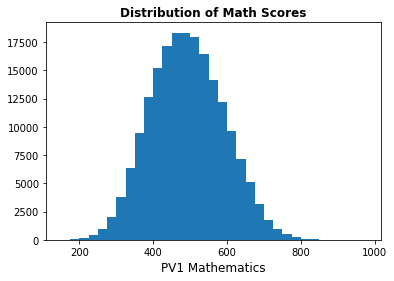

In [75]:
bins = np.arange(150,pisa_df["pv1_mathematics"].max() + 26, 25)
plt.hist(pisa_df["pv1_mathematics"], bins = bins)
plt.xlabel("PV1 Mathematics", fontsize = 12)
plt.title("Distribution of Math Scores", fontweight = "bold");

Most students score between 400 and 600 out of 1000. The mean for their scores is around 500. 

Which country has the most students?

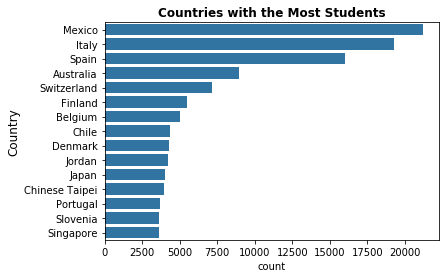

In [76]:
# using counplot to get the number of students per country
country_order = pisa_df["country"].value_counts().iloc[:15].index
sns.countplot(y = "country", data = pisa_df, color = base_color, order = country_order)
plt.ylabel("Country", fontsize = 12)
plt.title("Countries with the Most Students", fontweight = "bold");

Mexico city is the most frequent city for students who took the PISA test. 

In [77]:
country_order

Index(['Mexico', 'Italy', 'Spain', 'Australia', 'Switzerland', 'Finland',
       'Belgium', 'Chile', 'Denmark', 'Jordan', 'Japan', 'Chinese Taipei',
       'Portugal', 'Slovenia', 'Singapore'],
      dtype='object')

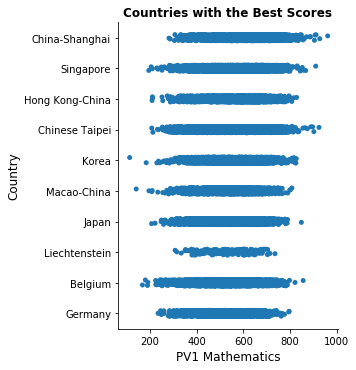

In [78]:
# Checking maths scores frequency per country
country_index = pisa_df.groupby('country')["pv1_mathematics"].mean()
country_order = country_index.sort_values(ascending = False).iloc[:10].index
sns.catplot(x = "pv1_mathematics", y = "country", data = pisa_df,
            color = base_color, order = country_order)
plt.ylabel("Country", fontsize = 12)
plt.xlabel("PV1 Mathematics", fontsize = 12)
plt.title("Countries with the Best Scores", fontweight = "bold");


China-Shanghai has the most students who have the best scores.

Checking countries that have the most students who scored more than the meaan of the whole dataset.

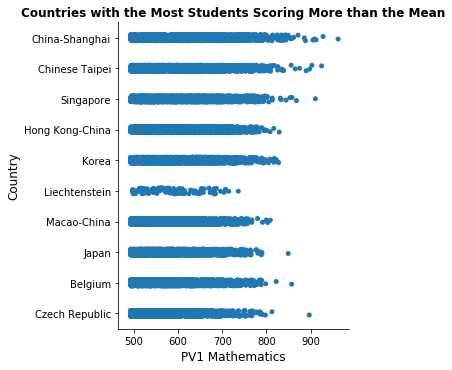

In [79]:
# Let's check students who got more than or equal to the average math score
avg_students_math = pisa_df.query('pv1_mathematics >= pv1_mathematics.mean()')

country_index = avg_students_math.groupby('country')["pv1_mathematics"].mean()
country_order = country_index.sort_values(ascending = False).iloc[:10].index
sns.catplot(x = "pv1_mathematics", y = "country", data = avg_students_math,
            color = base_color, order = country_order)
plt.ylabel("Country", fontsize = 12)
plt.xlabel("PV1 Mathematics", fontsize = 12)
plt.title("Countries with the Most Students Scoring More than the Mean", fontweight = "bold");



China-Shanghai is still on the top which proves our previous findings that students from these countries are scoring the best. However, Germany is not on the list of the top 10 countries achieving more than the mean.

Countries with the lowest scores

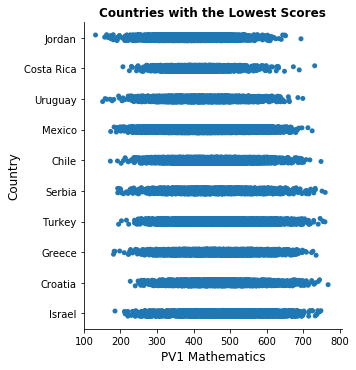

In [80]:
# checking countries with the lowest scorees
country_index = pisa_df.groupby('country')["pv1_mathematics"].mean()
country_order = country_index.sort_values(ascending = True).iloc[:10].index
sns.catplot(x = "pv1_mathematics", y = "country", data = pisa_df,
            color = base_color, order = country_order)
plt.ylabel("Country", fontsize = 12)
plt.xlabel("PV1 Mathematics", fontsize = 12)
plt.title("Countries with the Lowest Scores", fontweight = "bold");

These countries have the lowest scores but they still have students that are scoring more than 600 and 700 in some countries

Checking countries that have the most students who scored less than the mean of the whole dataset.

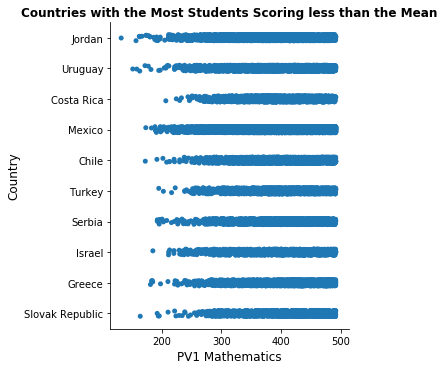

In [81]:
less_avg_students_math = pisa_df.query('pv1_mathematics < pv1_mathematics.mean()')

country_index = less_avg_students_math.groupby('country')["pv1_mathematics"].mean()
country_order = country_index.sort_values(ascending = True).iloc[:10].index
sns.catplot(x = "pv1_mathematics", y = "country", data = less_avg_students_math,
            color = base_color, order = country_order)
plt.ylabel("Country", fontsize = 12)
plt.xlabel("PV1 Mathematics", fontsize = 12)
plt.title("Countries with the Most Students Scoring less than the Mean", fontweight = "bold");


Jordan is still scoring the lowest for the average Math scores followed by Costa Rica and Uruguay

<b>Gender</b>

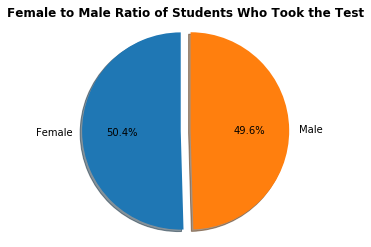

In [82]:
# checking the female to male ratio using matplotlib
labels = pisa_df["gender"].unique()
sizes = list(pisa_df["gender"].value_counts())
explode = (0.1, 0) 

fig, ax = plt.subplots()
ax.pie(sizes, explode = explode, labels = labels, autopct='%1.1f%%',
        shadow = True, startangle = 90)
ax.axis('equal')
ax.set_title("Female to Male Ratio of Students Who Took the Test", fontweight = "bold")

plt.show()

Females are more than males in the dataset, but there is not a big difference between both of them.

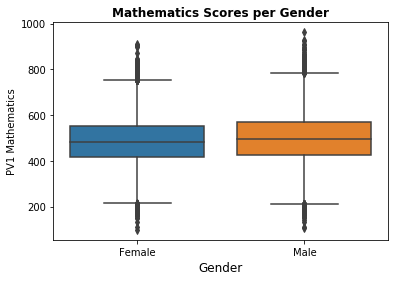

In [83]:
# Checking the difference between the scores of males and females using boxplot
sns.boxplot(x = "gender", y = "pv1_mathematics", data = pisa_df)
plt.title("Mathematics Scores per Gender", fontweight = "bold")
plt.xlabel("Gender", fontsize = 12)
plt.ylabel("PV1 Mathematics");

Females’ and males’ scores are not so different from each other. Both of them are approximately in the same interquartile range between 400 and 600.

Let's check for the best and the worst country based on gender.

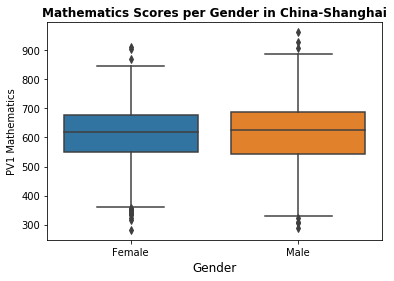

In [84]:
# Checking the difference between the scores of males and females in China-Shanghai using boxplot
China_Shanghai_df = pisa_df.query("country == 'China-Shanghai'")
sns.boxplot(x = "gender", y = "pv1_mathematics", data = China_Shanghai_df)

plt.title("Mathematics Scores per Gender in China-Shanghai", fontweight = "bold")
plt.xlabel("Gender", fontsize = 12)
plt.ylabel("PV1 Mathematics");

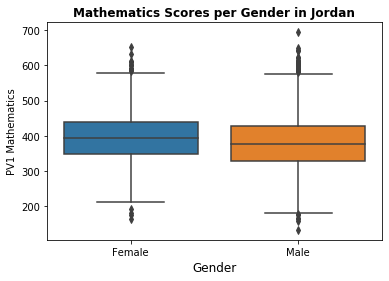

In [85]:
# Checking the difference between the scores of males and females in Jordan using boxplot

jordan_df = pisa_df.query("country == 'Jordan'")
sns.boxplot(x = "gender", y = "pv1_mathematics", data = jordan_df)
plt.title("Mathematics Scores per Gender in Jordan", fontweight = "bold")
plt.xlabel("Gender", fontsize = 12)
plt.ylabel("PV1 Mathematics");

For both countries, there is not a big difference between the two genders, and that is would give us an insight that gender is not correlated to academic performance.

<b>is_oecd</b>

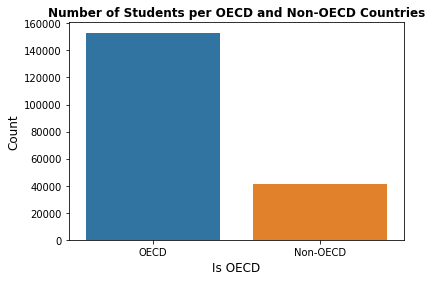

In [86]:
# Checking the number of students that are living in OECD countries
is_oecd_count = pisa_df["is_oecd"].value_counts()
is_oecd_order = is_oecd_count.index

sns.countplot(x = 'is_oecd', data = pisa_df, order = is_oecd_order)
plt.xlabel("Is OECD", fontsize = 12)
plt.ylabel('Count', fontsize = 12)
plt.title("Number of Students per OECD and Non-OECD Countries", fontweight = 'bold');

There are more students from OECD countries who took the PISA test than students from non-OECD.

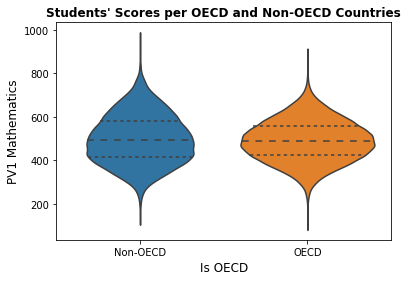

In [87]:
sns.violinplot(data = pisa_df, x = 'is_oecd', y = 'pv1_mathematics',
               inner = 'quartile')

plt.xlabel("Is OECD", fontsize = 12)
plt.ylabel('PV1 Mathematics', fontsize = 12)
plt.title("Students' Scores per OECD and Non-OECD Countries", fontweight = 'bold');


Based on the graph, there is a higher probability for OECD students to achieve better scores than the Non-OECD countries.

<b> Gedner | OECD | pv1-mathematics</b>

''

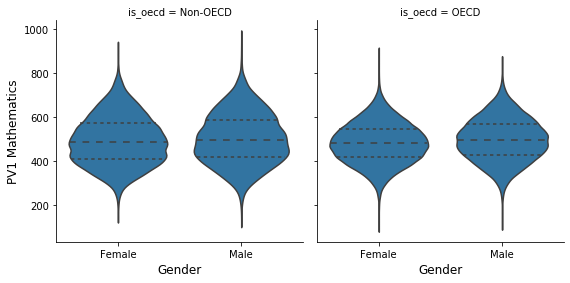

In [88]:
ax = sns.FacetGrid(data = pisa_df, col = 'is_oecd', size = 4)
ax.map(sns.violinplot, 'gender', 'pv1_mathematics', inner = "quartile")

#ax.set_title("Mathematics Scores per Gender for OECD and Non_OECD Countries")
ax.set_xlabels("Gender", fontsize = 12)
ax.set_ylabels("PV1 Mathematics", fontsize = 12)
;


The width of sections for both genders is extremely alike each other for both OECD and Non_OECD countries. But the difference between mathematics scores is much clearer between countries type whether it is OECD or not. Therefore, the conclusion is that academic performance doesn't depend on gender, it is more about the county or to be more accurate in the education system of the country.

<b>Belong at school</b>

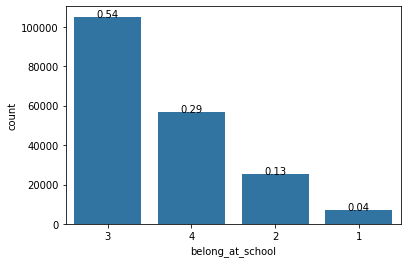

In [89]:
belong_school_count = pisa_df["belong_at_school"].value_counts()
belong_school_index = belong_school_count.index

n_students = float(len(pisa_df))
ax = sns.countplot(x = 'belong_at_school', data = pisa_df, color = base_color,
              order = belong_school_index)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/n_students),
            ha="center");

There are more students agree that they feel of belonging to the school. By adding agree and strongly agree together, we see that more than 83% have that feeling.

<b>Feel happy at school</b>

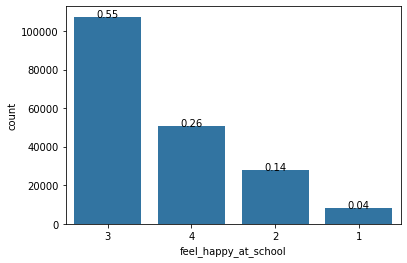

In [90]:
happy_school_count = pisa_df["feel_happy_at_school"].value_counts()
happy_school_index = happy_school_count.index

n_students = float(len(pisa_df))
ax = sns.countplot(x = 'feel_happy_at_school', data = pisa_df, color = base_color,
              order = happy_school_index)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/n_students),
            ha="center");

There are more students agree that they feel of being happy at the school. By adding agree and strongly agree together, we see that more than 80% have that feeling.

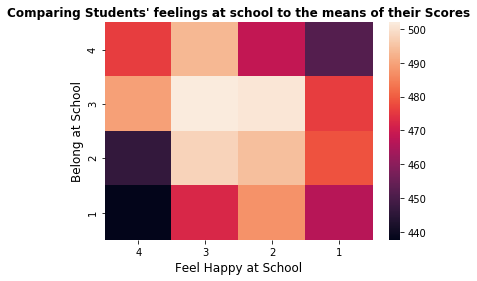

In [91]:
school_att = pisa_df.groupby(['feel_happy_at_school', "belong_at_school"])["pv1_mathematics"].mean().reset_index()
school_att = school_att.pivot("belong_at_school", "feel_happy_at_school","pv1_mathematics")
ax = sns.heatmap(school_att)
plt.xlabel('Feel Happy at School', fontsize = 12)
plt.ylabel('Belong at School', fontsize = 12)
plt.title("Comparing Students' feelings at school to the means of their Scores",
          fontweight = 'bold');

Schools that help students to feel belonging to it and who make students feel happier, makes student achieve higher grades.

<b>Computer at school</b>

There are two condtions for the data to have a computer at school, the first one is `Yes, and I use it` and the second one is `Yes, but I don't use it`. We ony care about whether the school have a computer or not. Therefore, I will edit the dataset to have two answers only: `Yes` or `No`.

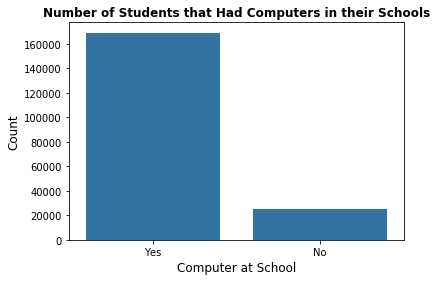

In [92]:
sns.countplot(x = 'computer_at_school', data = pisa_df,
              color = base_color)
plt.xlabel("Computer at School", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.title("Number of Students that Had Computers in their Schools", fontweight = "bold");

Most schools have computers.

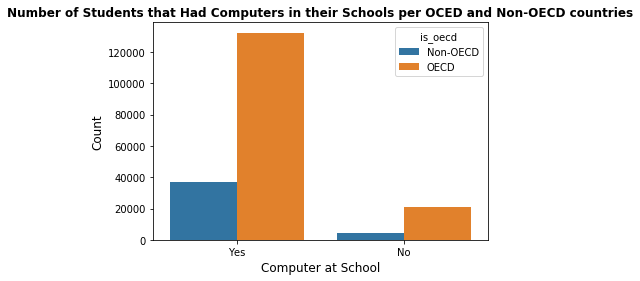

In [93]:
# Checking which schools has more computers, the one in the OECDs or in the Non-OECDs
com_count = pisa_df.groupby('computer_at_school').size()
com_order = com_count.index

sns.countplot(data = pisa_df, x = "computer_at_school",
              hue = "is_oecd", order = com_order)

plt.xlabel("Computer at School", fontsize = 12)
plt.ylabel("Count", fontsize = 12)
plt.title("Number of Students that Had Computers in their Schools per OCED and Non-OECD countries"
          , fontweight = "bold");

OECD countries have more computers in their schools than non-oecd ones

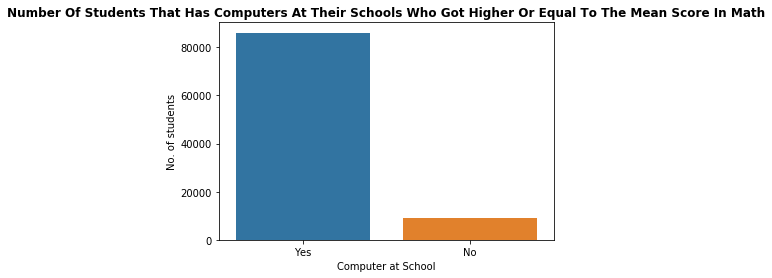

In [94]:
# Creating a dataframe of students who scored greater than the mean
greater_mean_df_math = pisa_df.query("pv1_mathematics >= pv1_mathematics.mean()")

sns.countplot(data = greater_mean_df_math, x = 'computer_at_school')
plt.title("Number of Students that has Computers at their schools who got higher or equal to the mean score in math".title(), 
           fontweight = "bold")
plt.xlabel("Computer at School")
plt.ylabel("No. of students");


The plot shows a significant difference between students' academic performance, who had computers at their schools, and those who have not. Therefore, we can say that students who chose schools that have computers have a higher chance of achieving better grades.

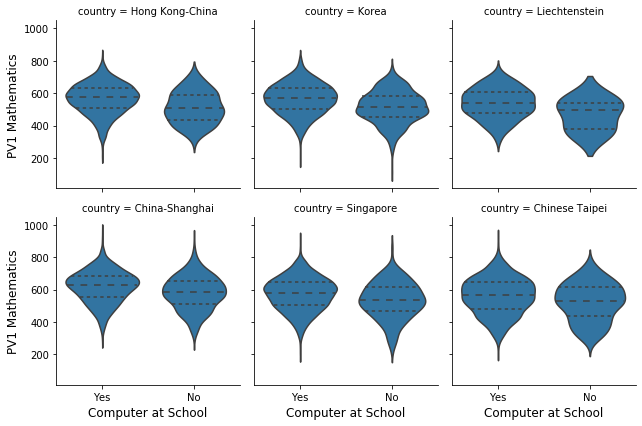

In [95]:
top_countries_df = pisa_df.query('country == ["China-Shanghai", "Singapore", "Hong Kong-China", "Chinese Taipei", "Korea", "Liechtenstein"]')

ax = sns.FacetGrid(data = top_countries_df, col = 'country', col_wrap = 3, size = 3)
ax.map(sns.violinplot, 'computer_at_school', 'pv1_mathematics', 
       inner = "quartile")

ax.set_xlabels("Computer at School", fontsize = 12)
ax.set_ylabels("PV1 Mathematics", fontsize = 12);

The more computers these schools have, the better grades students can achieve. However, some students of these countries achieved high gardes although they did not have computers at their schools.

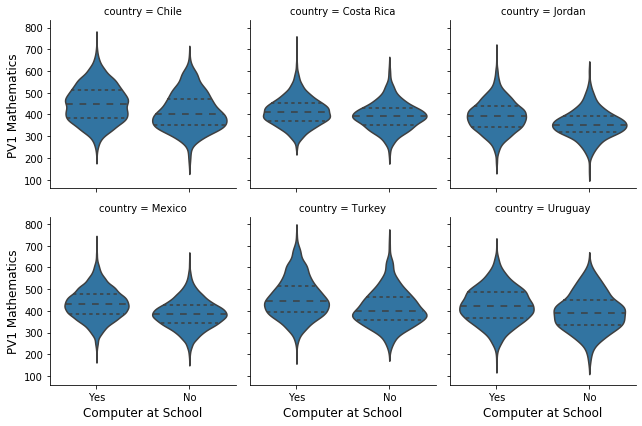

In [96]:
lowest_countries_df = pisa_df.query('country == ["Jordan", "Costa Rica", "Uruguay", "Mexico", "Chile", "Turkey"]')
country_index = lowest_countries_df.groupby('country')["pv1_mathematics"].mean()
country_order = country_index.sort_values(ascending = False).index

ax = sns.FacetGrid(data = lowest_countries_df, col = 'country',
                   col_wrap = 3, size = 3)
ax.map(sns.violinplot, 'computer_at_school', 'pv1_mathematics', inner = "quartile")
ax.set_xlabels("Computer at School", fontsize = 12)
ax.set_ylabels("PV1 Mathematics", fontsize = 12);

This plot confirms our previous findings that even at the countries with lowest scores, having computers at schools makes students achieved higer grades. For schools that do not have computers, it is obvious to see the density of students who achieved less than the average.

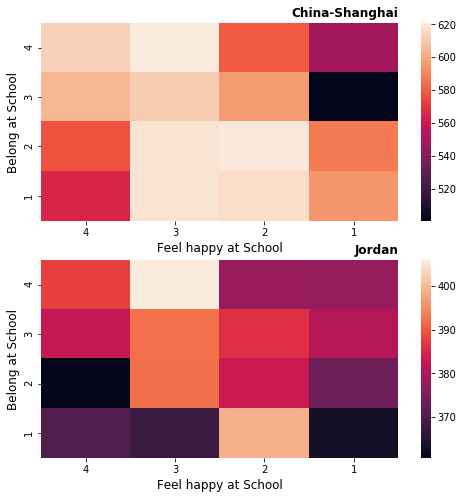

In [97]:
# Checking how students feel in China-Shanghai (The country with the best scores)
plt.subplots(figsize = (8,8))

plt.subplot(2, 1, 1)

China_Shanghai_df = pisa_df.query('country == "China-Shanghai"')
school_att = China_Shanghai_df.groupby(['feel_happy_at_school', "belong_at_school"])["pv1_mathematics"].mean().reset_index()
school_att = school_att.pivot("belong_at_school", "feel_happy_at_school","pv1_mathematics")
ax = sns.heatmap(school_att)
plt.title("China-Shanghai", loc = "right", fontweight = "bold")
plt.xlabel("Feel happy at School", fontsize = 12)
plt.ylabel("Belong at School", fontsize = 12);

# Checking how students feel in Jordan (The country with the lowest scores)

plt.subplot(2, 1, 2)

jordan_df = pisa_df.query('country == "Jordan"')
school_att = jordan_df.groupby(['feel_happy_at_school', "belong_at_school"])["pv1_mathematics"].mean().reset_index()
school_att = school_att.pivot("belong_at_school", "feel_happy_at_school","pv1_mathematics")
ax = sns.heatmap(school_att)
plt.title("Jordan", loc = "right", fontweight = 'bold')
plt.xlabel("Feel happy at School", fontsize = 12)
plt.ylabel("Belong at School", fontsize = 12);



In china-shanghai, the country with the best scores, most students feel like that they are happy at it and belonging to it and this is reflected on their mean scores between 500 and 600. On the other hand in Jordan, the country with lowest scores, students does not feel happiness or belonging to school and that is why their scores' means are between 380 and 400.

As a final step for my analysis, I calculated how many students achieved higher than the mean per gender for every country of the top and worst countries in Mathematics scores.

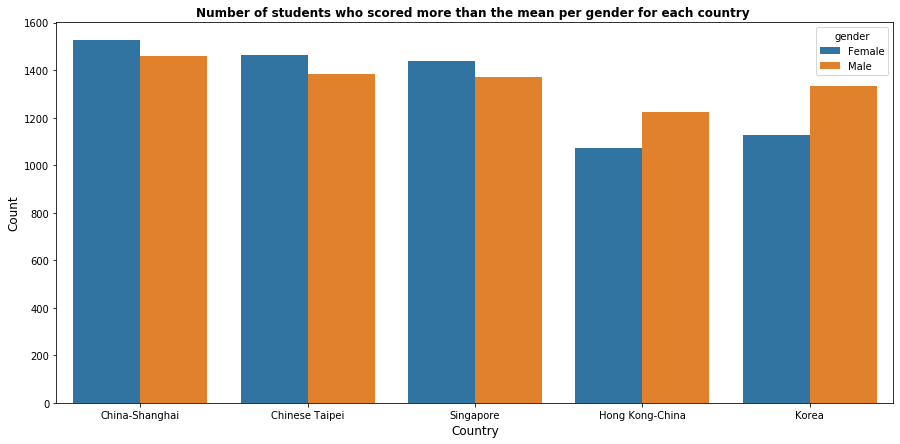

In [98]:
plt.figure(figsize=[15, 7])

top_countries_df = pisa_df.query("pv1_mathematics >= pv1_mathematics.mean()")
top_countries_df = top_countries_df.query('country == ["China-Shanghai", "Singapore", "Hong Kong-China", "Chinese Taipei", "Korea"]')

country_index = top_countries_df.groupby('country')["pv1_mathematics"].mean()
country_order = country_index.sort_values(ascending = False).index

sns.countplot(x = "country", hue = "gender", data = top_countries_df, order = country_order)
plt.title("Number of students who scored more than the mean per gender for each country ",
          fontweight = "bold")
plt.xlabel("Country", fontsize = 12)
plt.ylabel("Count", fontsize = 12);

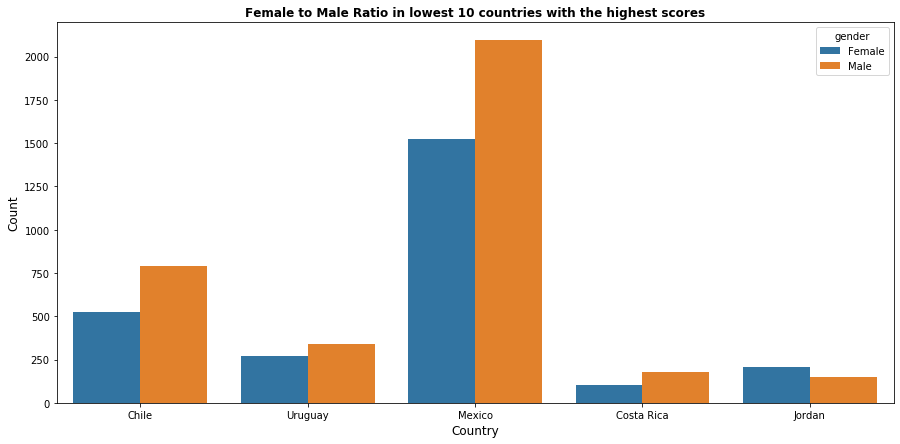

In [99]:
plt.figure(figsize=[15, 7]);

lowest_countries_df = pisa_df.query("pv1_mathematics >= pv1_mathematics.mean()")
lowest_countries_df = lowest_countries_df.query('country == ["Jordan", "Costa Rica", "Uruguay", "Mexico", "Chile"]')

country_index = lowest_countries_df.groupby('country')["pv1_mathematics"].mean()
country_order = country_index.sort_values(ascending = False).index

sns.countplot(x = "country", hue = "gender", data = lowest_countries_df, order = country_order)
plt.title("Female to Male Ratio in lowest 10 countries with the highest scores", fontweight = "bold")
plt.xlabel("Country", fontsize = 12)
plt.ylabel("Count", fontsize = 12);

There is not any significant difference between males and females in math scores. In some countries, males are better, in other countries we see that females are better, but even in both scenarios, the difference is not important to talk about. This suggests that gender does not have any correlation with academic performance.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

Gender does not have any correlation with academic performance. Both genders had good scores in different countries. Some countries had the males scoring better, others had females, but overall the difference is not so big to judge any correlation between both variables. On the other hand, the visualizations showed that scores are different across different countries. Some had more students scoring higher than mean, higher than the other countries. Therefore, I think that the educational system of each country is affecting students’ scores, but further investigation needs to be done to prove this point. Now, we can say that being a student in some countries, can help you achieve better grades. Moreover, I spotted that if the school is going digital, supporting computers and technology at it, this would help students achieve higher scores. Additionally, I found that students from OECD countries achieve higher scores than Non-OECD ones. Finally, I observed that there is a correlation between students’ feelings at schools and academic performance. If students are feeling happy and connected to the school, this would help them towards better scores.

### Were there any interesting or surprising interactions between features?

I expected that the top country in Mathemtics scores should be a country from the OECDs but it was not.



# Sources:

1. https://stackoverflow.com/questions/30996289/utf8-codec-cant-decode-byte-0xf3/30997010
2. https://www.oecd.org/pisa/pisaproducts/PISA%202012%20Technical%20Report_Chapter%2017.pdf
3. https://stackoverflow.com/questions/31749448/how-to-add-percentages-on-top-of-bars-in-seaborn
4. https://seaborn.pydata.org/generated/seaborn.heatmap.html
5. https://seaborn.pydata.org/tutorial/categorical.html